# Lista 1

## Ćwiczenia

In [1]:
# wczytanie pliku ze sciezki, bez naglowkow
drukarki = read.table("drukarki.txt", header = FALSE)
# wprowadzenie wlasnych nazw kolumn dla zbioru danych (kiedy wystepuje wiecej niz jedna nazwa to nazwy umieszczamy wewnatrz wektora)
colnames(drukarki) = c("czas", "n")
# wyswietlenie pierwszych wierszy w pliku
head(drukarki)

,czas,n
,<int>,<int>
1,6,13
2,9,25
3,8,26
4,3,10
5,9,27
6,6,21


#### (a) Wizualizacja danych

In [2]:
# od tego momentu uzywamy okreslonych nazw wewnatrz pliku (bez odwolan do niego)
attach(drukarki)

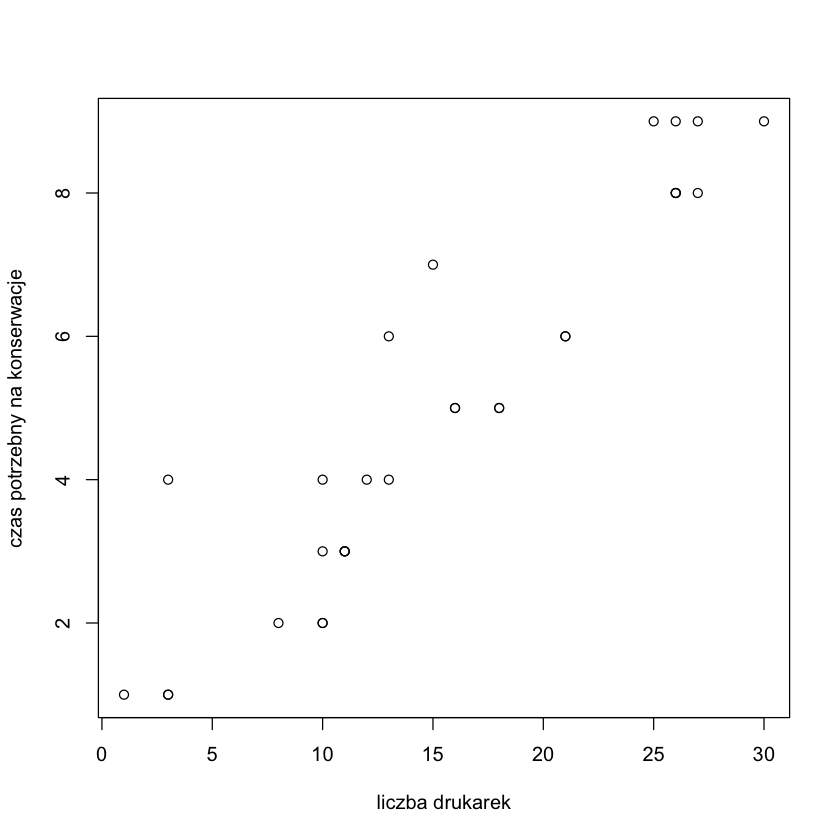

In [3]:
# wykres rozrzutu - na osi X jest liczba drukarek, na osi Y czas niezbedny do ich konserwacji, nastepnie podpisujemy odpowiednio osie
plot(n, czas, xlab = "liczba drukarek", ylab = "czas potrzebny na konserwacje")

####  (b) Zależność pomiędzy zmiennymi jest liniowa. Wraz ze wzrostem liczby drukarek rośnie również czas potrzebny na ich konserwację.

#### (c) Histogram

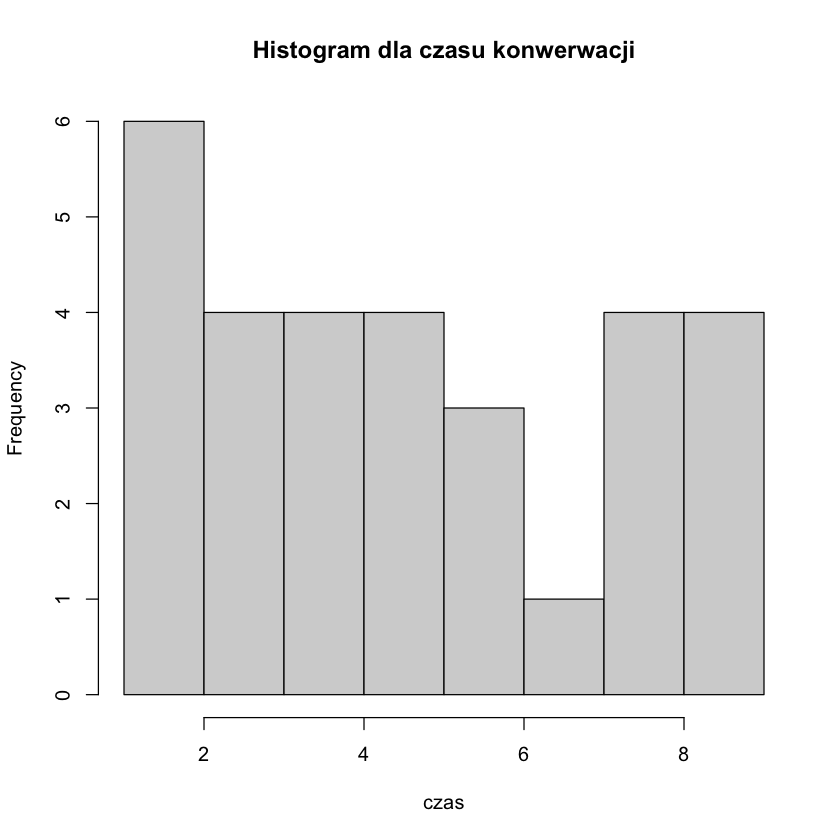

In [4]:
# histogram dla okreslonej zmiennej oraz tytulem
hist(czas, main = "Histogram dla czasu konwerwacji")

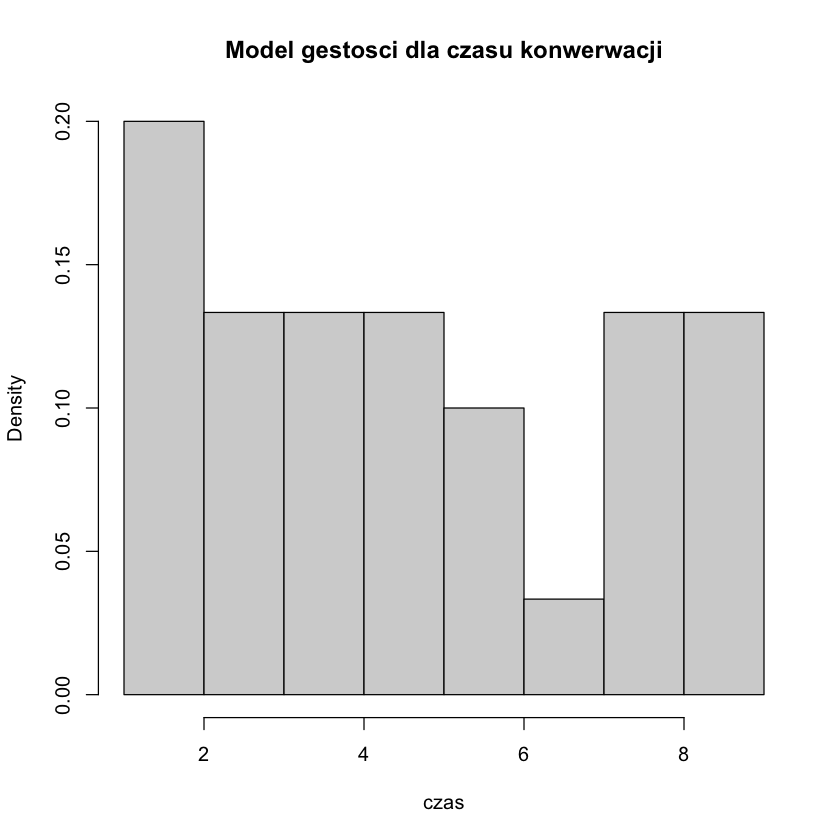

In [5]:
# wykres gestosci prawdopodobienstwa dla okreslonej zmiennej oraz tytulem
hist(czas, main = "Model gestosci dla czasu konwerwacji", prob = TRUE)

#### (d) Model regresji liniowej:
$y = \beta_0 + \beta_1 \cdot x + \epsilon$

In [6]:
# opis modelu:
# y - czas
# β0 - wyraz wolny
# β1 - wspolczynnik nachylenia
# x - liczba drukarek
# ε - blad losowy (zawsze popelniany przy estymacji)

In [7]:
# wykonanie modelu regresji liniowej czasu od ilosci drukarek oraz jego przypisanie do zmiennej
model_1 = lm(czas ~ n)
# podsumowanie modelu
summary(model_1)


Call:
lm(formula = czas ~ n)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3587 -0.6406 -0.2494  0.2341  2.7053 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41017    0.37914   1.082    0.289    
n            0.29485    0.02154  13.686 6.31e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9686 on 28 degrees of freedom
Multiple R-squared:   0.87,	Adjusted R-squared:  0.8653 
F-statistic: 187.3 on 1 and 28 DF,  p-value: 6.309e-14


In [8]:
# opis powyzszego wyniku:
# Call - uzyta formula
# Residuals - rozklad reszt, powinny miec one rozklad normalny o sredniej 0, ktory jest symetryczny (mediana bliska sredniej), a wartosci bezwzgledne z minimum i maksimum powinny byc rowne
# Coefficients - wartosci dla wyrazu wolnego (Intercept) oraz wspolczynnika nachylenia (n)
# otrzymujemy: okreslone estymatory (Estimates), bledy standardowe (Std. error), statystyke t (t value) - estymator podzielony przez blad standardowy, p-wartosc (Pr(>|t|))
# p-wartosci porownujemy z przyjetym poziomem istotnosci (zazwyczaj 0.05)
# tylko wspolczynnik dla n jest istotny statystycznie (p-wartosc < 0.05)
# wspolczynnik R2 (Adjusted R-squared) jest na poziomie 87% - jest on dosyc wysoki, wiec dane sa dobrze dopasowane, X w 87% jest w stanie opisac wartosci Y

In [9]:
# pelna struktura obiektu model_1
str(model_1)

List of 12
 $ coefficients : Named num [1:2] 0.41 0.295
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "n"
 $ residuals    : Named num [1:30] 1.7568 1.2186 -0.0763 -0.3587 0.6289 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ effects      : Named num [1:30] -27.386 -13.256 -0.535 -0.54 0.153 ...
  ..- attr(*, "names")= chr [1:30] "(Intercept)" "n" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:30] 4.24 7.78 8.08 3.36 8.37 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:30, 1:2] -5.477 0.183 0.183 0.183 0.183 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:30] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "n"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.22
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 28
 $ xlevels      : Named list()

In [10]:
# otrzymanie szukanych wspolczynnikow
model_1$coef
# lub: model_1$coefficients

(Intercept)           n 
   0.410168    0.294850

#### (i) Zapis modelu regresji:
$\widehat{y} = 0.41017 + 0.29485 \cdot n$

In [11]:
# n - liczba drukarek

#### Przykład dla 15 drukarek:
$\widehat{y} = 0.41017 + 0.29485 \cdot 15 = 4.83292$

#### (ii) Histogram wartości resztowych

#### Test Shapiro-Wilka:
$H_{0}:$ dane pochodzą z rozkładu normalnego vs. $H_{1}:$ dane nie pochodzą z rozkładu normalnego


	Shapiro-Wilk normality test

data:  reszty
W = 0.87222, p-value = 0.001878


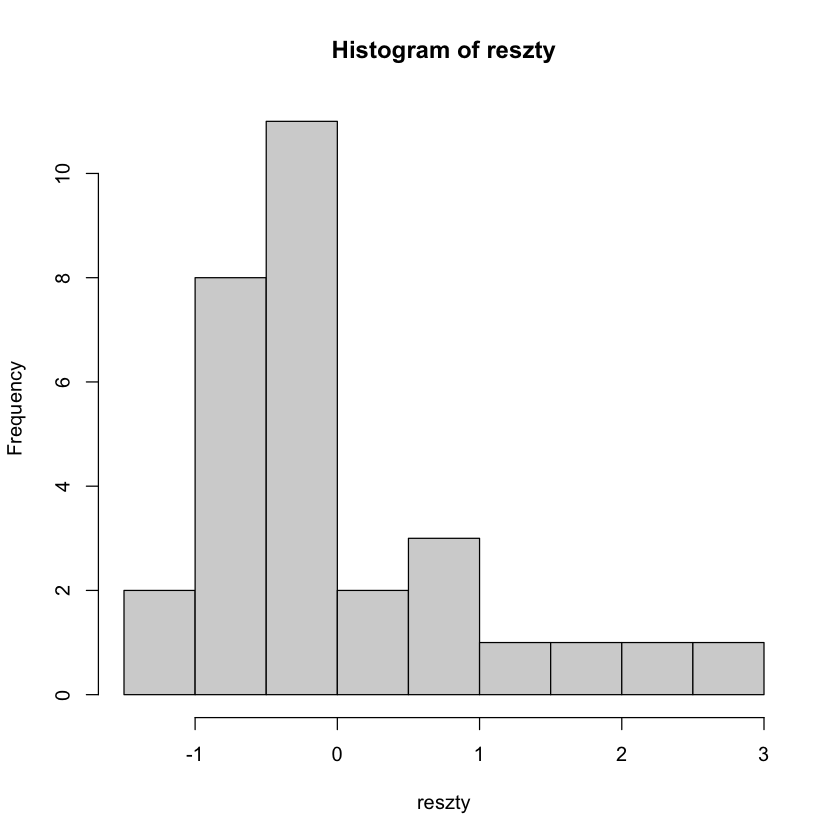

In [12]:
# sprawdzamy czy rozklad reszt jest normalny (ε ze wzoru modelu) (o sredniej 0 i niewielkiej wariancji)
# zapisujemy reszty z modelu jako osobna zmienna
reszty = residuals(model_1)
# wykonanie histogramu
hist(reszty)
# test Shapiro-Wilka
shapiro.test(reszty)

In [13]:
# elementy na histogramie sa mocno porozrzucane - istnieje podejrzenie, ze nie ma rozkladu normalnego
# test Shapiro-Wilka potwierdza powyzsza obserwacje - przyjmujemy hipoteze alternatywna: rozklad reszt nie jest rozkladem normalnym (p-wartosc < 0.05)

#### (iii) Dane z dopasowaną prostą regresji

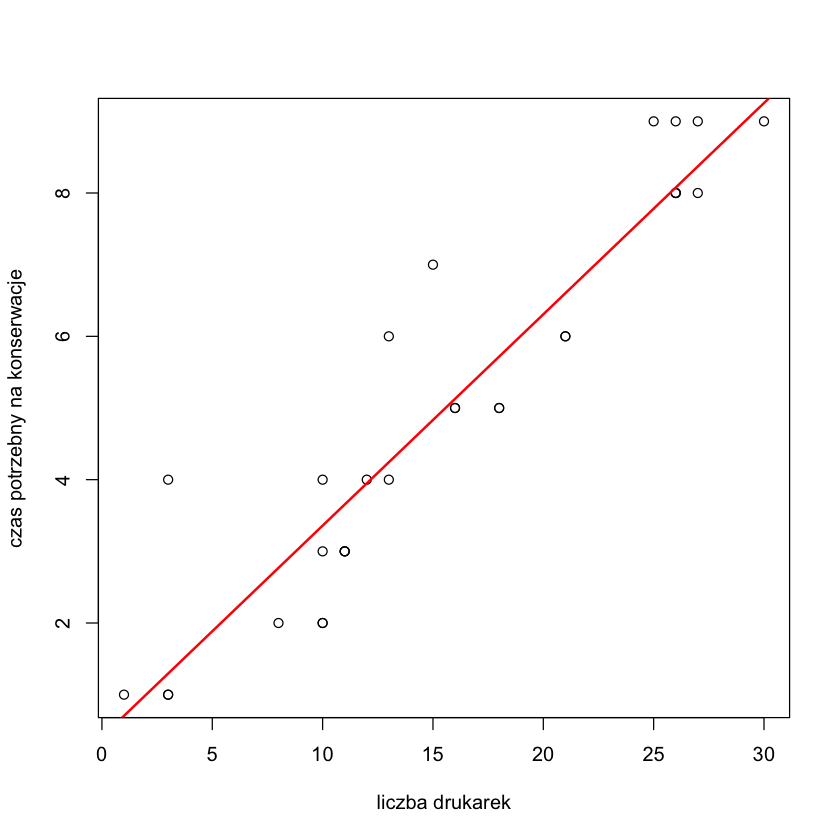

In [14]:
# wykonanie wykresu
plot(n, czas, xlab = "liczba drukarek", ylab = "czas potrzebny na konserwacje")
# dodanie prostej regresji z modelu o okreslonym kolorze i grubosci
abline(model_1, col = "red", lwd = 2)

#### (iv) Wykres kwantyl-kwantyl

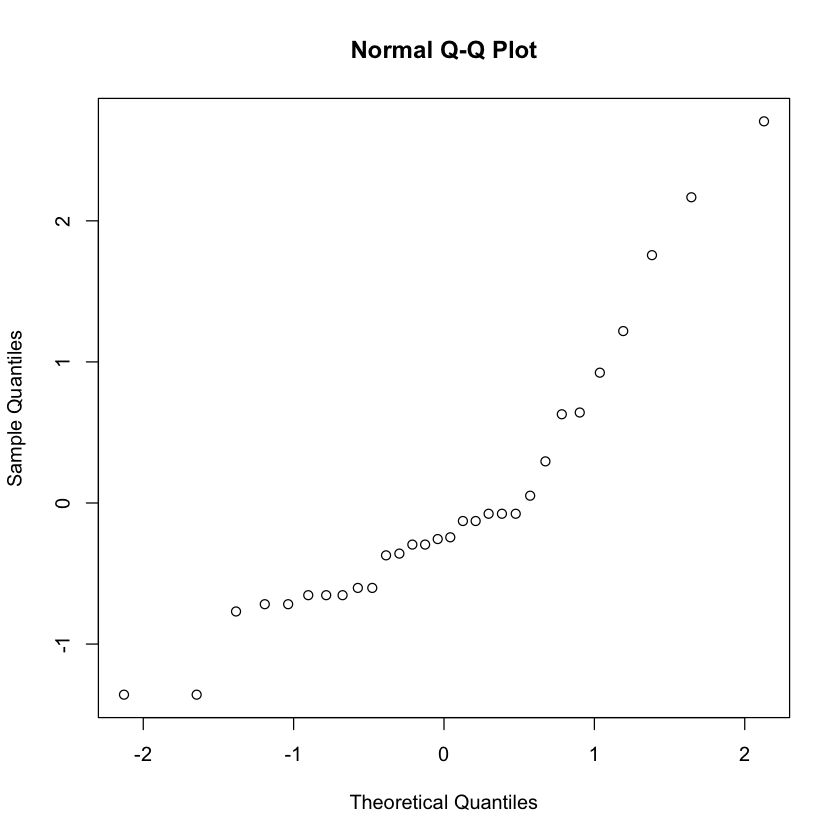

In [15]:
# graficzne sprawdzenie normalnosci rozkladu reszt
# wykonanie wykresu kwantyl-kwantyl dla rozkladu reszt
qqnorm(reszty)

In [16]:
# na osi X mamy kwantyle teoretyczne, a na osi Y kwantyle z proby
# w przypadku rozkladu normalnego kwantyle teoretyczne pokrywaja sie z kwantylami z proby - powinna wystepowac linia prosta zbudowana z naszych danych
# w naszym przypadku linia prosta dosyc szybko zalamuje sie - duzo punktow znajduje sie poza prosta

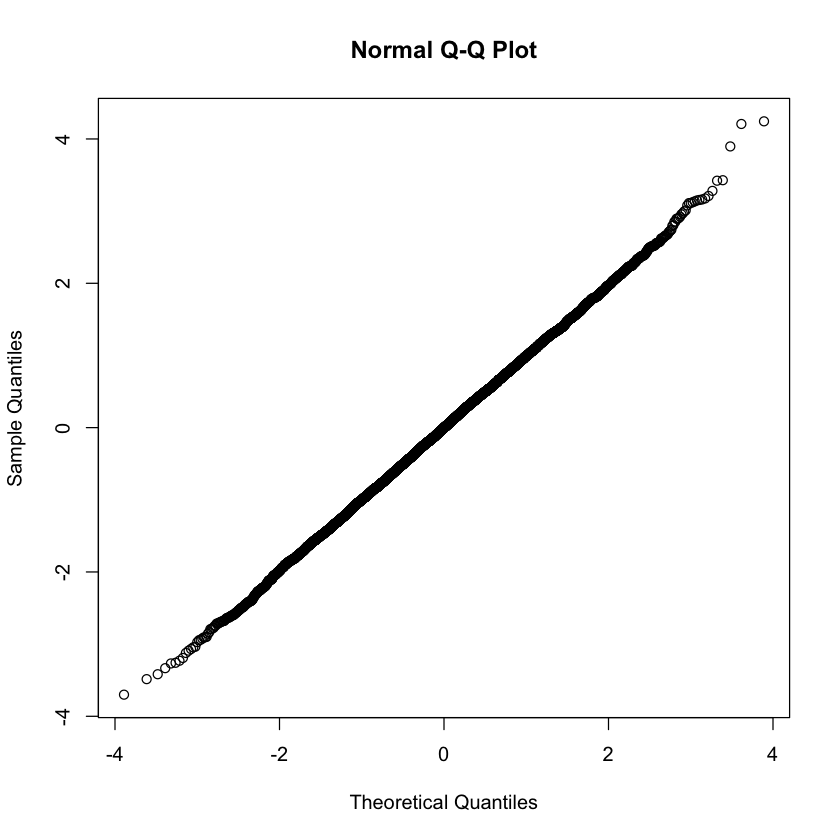

In [17]:
# przykladowy wykres kwantyl-kwantyl dla 10000 danych pochodzacych z rozkladu normalnego
qqnorm(rnorm(10000))

In [18]:
# dla danych pochodzacych z rozkladu normalnego otrzymujemy linie prosta (poza efektami brzegowymi na poczatku i koncu)

#### (v) 95% przedziały ufności i przedziały predykcyjne na podzbiorze obserwacji

In [19]:
# informacje o naszym modelu
model_1


Call:
lm(formula = czas ~ n)

Coefficients:
(Intercept)            n  
     0.4102       0.2949  


In [20]:
# rosnace posortowanie wartosci n (liczby drukarek)
sort(n)

[1]  1  3  3  3  8 10 10 10 10 11 11 11 12 13 13 15 16 16 18 18 21 21 25 26 26
[26] 26 26 27 27 30

In [21]:
# rozpietosc naszego zbioru danych miesci sie w granicach 1-30

In [22]:
# nowy zbior danych stworzony na podstawie istniejacego zbioru (w ktorym okreslilismy zakres danych)
nowe_dane = data.frame(1:30)
# nazwanie kolumny ta sama nazwa co oryginalnego zbioru danych
colnames(nowe_dane) = 'n'
# dla kazdej wartosci staramy sie znalezc ilosc czasu niezbedna do konserwacji okreslonej liczby drukarek
predict(model_1, newdata = nowe_dane)

1         2         3         4         5         6         7         8 
0.7050181 0.9998681 1.2947181 1.5895681 1.8844181 2.1792682 2.4741182 2.7689682 
        9        10        11        12        13        14        15        16 
3.0638182 3.3586682 3.6535182 3.9483683 4.2432183 4.5380683 4.8329183 5.1277683 
       17        18        19        20        21        22        23        24 
5.4226184 5.7174684 6.0123184 6.3071684 6.6020184 6.8968685 7.1917185 7.4865685 
       25        26        27        28        29        30 
7.7814185 8.0762685 8.3711186 8.6659686 8.9608186 9.2556686

In [23]:
# mozemy rowniez wewnatrz obiektu data.frame zdefiniowac nazwe kolumny: nowe_dane = data.frame(n = 1:30)
# nie trzeba pozniej jej nazywac uzywajac do tego osobnej komendy

In [24]:
# przedzialy predykcyjne
przedzial_predykcyjny = predict(model_1, int = 'p', newdata = nowe_dane)
# int = p - przedzial predycyjny

In [25]:
# przedzialy ufnosci
przedzial_ufnosci = predict(model_1, int = 'c', newdata = nowe_dane)
# int = c - przedzial ufnosci

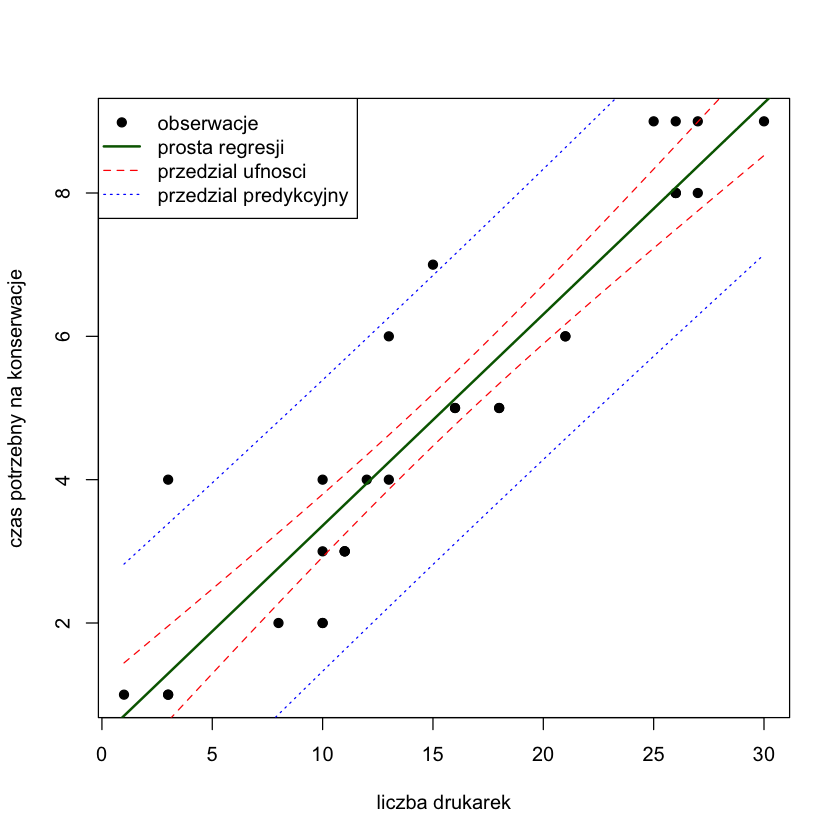

In [26]:
# wykres wizualizujacy nasze przedzialy
# wykonanie wykresu z punktami
plot(n, czas, xlab = "liczba drukarek", ylab = "czas potrzebny na konserwacje", pch = 19)
# dodanie linii modelu
abline(model_1, col = "darkgreen", lwd = 2)
# dodanie przedzialu ufnosci (lty - z linia typu 2, najpierw mamy 0, aby ponownie nie definiowac linii modelu)
matlines(nowe_dane$n, przedzial_ufnosci, lty = c(0, 2, 2), col = "red")
# dodanie przedzialu predykcyjnego (lty - z linia typu 3, najpierw mamy 0, aby ponownie nie definiowac linii modelu)
matlines(nowe_dane$n, przedzial_predykcyjny, lty = c(0, 3, 3), col = "blue")

# dodanie legendy - precyzujemy jej umiejscowienie, nazwy w legendzie (w wektorze), col - kolory oznaczen w legendzie (w wektorze), pch - typ punktow (w wektorze), lty - typ linii (w wektorze), lwd - grubosc linii (w wektorze)
legend("topleft", c("obserwacje", "prosta regresji", "przedzial ufnosci", "przedzial predykcyjny"), col = c("black", "darkgreen", "red", "blue"), pch = c(19, NA, NA, NA), lty = c(0, 1, 2, 3), lwd = c(1, 2, 1, 1))

In [27]:
# wiekszosc danych znajduje sie w przedziale predykcyjnym (28 na 30 obserwacji), pewna ich ilosc takze w przedziale ufnosci

#### (vi) Dolna granica przedziału ufności dla 3. obserwacji

In [28]:
# predykcja dla wszystkich wartosci
predict(model_1, int = 'c')
# int = c - wartosci dla przedzialu ufnosci

,fit,lwr,upr
1,4.2432183,3.86367814,4.622758
2,7.7814185,7.22958028,8.333257
3,8.0762685,7.49042218,8.662115
4,3.3586682,2.92098120,3.796355
5,8.3711186,7.74998936,8.992248
6,6.6020184,6.16760666,7.036430
7,3.6535182,3.23898817,4.068048
8,5.1277683,4.76501957,5.490517
9,1.2947181,0.63231814,1.957118
10,9.2556686,8.52291480,9.988422


In [29]:
# predykcja dla 3 wartosci
predict(model_1, int = 'c')[3,]
# int = c - wartosci dla przedzialu ufnosci

fit      lwr      upr 
8.076269 7.490422 8.662115

#### Dolna granica przedziału ufności dla 3. obserwacji wynosi 7,49042218321189

#### (vii) Macierz korelacji i wartość współczynnika Pearsona

In [30]:
# macierz korelacji pomiedzy wszystkimi zmiennymi w zbiorze danych
cor(drukarki)

,czas,n
czas,1.000000,0.932713
n,0.932713,1.000000


In [31]:
# wartosc wspolczynnika Pearsona
cor(czas, n)

[1] 0.932713

#### (viii) Sprawdzenie wartości współczynnika korelacji Pearsona różnej od 0:
$H_{0}: \rho = 0$ vs. $H_{1}: \rho \neq 0$ ($\rho$ - współczynnik korelacji Pearsona)

In [32]:
# test wspolczynnika korelacji Pearsona dla naszych zmiennych
cor.test(czas, n)
# conf.level - definiuje nam wartosc przedzialu ufnosci (domyslnie 0.95)


	Pearson's product-moment correlation

data:  czas and n
t = 13.686, df = 28, p-value = 6.309e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8621502 0.9677809
sample estimates:
     cor 
0.932713 


#### $\rho$ jest istotnie różny od 0 ponieważ p-value $ = 6.309e-14 < 0.05 = \alpha$

#### (ix) 95% przedział ufności dla współczynnika korelacji Pearsona $\rho$ wynosi: $(0.8621502, 0.9677809)$

## Zadanie 1

#### Wczytywanie danych

In [33]:
# instalacja pakietu
#install.packages("ISwR")

In [34]:
# wczytanie pakietu
library(ISwR)

In [35]:
# wczytanie pakietu
data(kfm)
# wyswietlenie pierwszych wierszy w naszych danych
head(kfm)
# wielkosc tabeli (liczba wierszy i liczba kolumn)
dim(kfm)

,no,dl.milk,sex,weight,ml.suppl,mat.weight,mat.height
,<int>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>
1,1,8.42,boy,5.002,250,65,173
2,4,8.44,boy,5.128,0,48,158
3,5,8.41,boy,5.445,40,62,160
4,10,9.65,boy,5.106,60,55,162
5,12,6.44,boy,5.196,240,58,170
6,16,6.29,boy,5.526,0,56,153


[1] 50  7

In [36]:
# opis tabeli:
# no - numer pacjenta (niemowleta w wieku ok. 2 miesiecy)
# dl.milk - ilosc wypitego mleka w dl przez niemowleta w ciagu 24 godzin
# sex - plec niemowlecia
# weight - waga niemowlecia w kg
# ml.suppl - ilosc przyjetego dodatkowo suplementu w ml przez niemowleta w ciagu 24h
# mat.weight - waga matki w kg
# mat.height - wzrost matki w cm

#### (a) Analiza wpływu zmiennych objaśniających ilość spożytego mleka za pomocą regresji wielokrotnej

In [37]:
# stworzenie modelu - . oznacza wypisanie wszystkich zmiennych (oprocz tej oznaczonej jako y) bez zmiennej no (oznaczajacej numer porzadkowy), na koniec definiujemy zbior danych
model_1_1 = lm(dl.milk ~ . - no, data = kfm)
# stworzenie modelu identycznego jak powyzej: model_1_1 = lm(dl.milk ~ sex + weight + ml.suppl + mat.weight + mat.height, data = kfm)
# stworzenie modelu identycznego jak powyzej: model_1_1 = lm(kfm$dl.milk ~ kfm$sex + kfm$weight + kfm$ml.suppl + kfm$mat.weight + kfm$mat.height)

In [38]:
# podsumowanie modelu
summary(model_1_1)


Call:
lm(formula = dl.milk ~ . - no, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74201 -0.81173 -0.00926  0.78326  2.52646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.681839   4.361561  -2.678 0.010363 *  
sexgirl      -0.499532   0.312672  -1.598 0.117284    
weight        1.349124   0.322450   4.184 0.000135 ***
ml.suppl     -0.002233   0.001241  -1.799 0.078829 .  
mat.weight    0.006212   0.023708   0.262 0.794535    
mat.height    0.072278   0.030169   2.396 0.020906 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 44 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.4943 
F-statistic: 10.58 on 5 and 44 DF,  p-value: 1.03e-06


In [39]:
# istotne statystycznie sa: wyraz wolny, waga niemowlaka oraz wzrost matki
# przykladowo:
# kiedy matka jest wyzsza o 1 cm, to dziecko spozywa w ciagu doby o 0.07 dl wiecej mleka
# kiedy matka ma wieksza wage o 1 kg, to dziecko spozywa w ciagu doby o 0.006 dl wiecej mleka
# kiedy dziecko spozywa o 1 ml suplementu wiecej w ciagu 24 godzin, to dziecko spozywa w ciagu doby o 0.002 dl mniej mleka

#### (b) Dziewczynki piją mniej mleka o $0.499532$ dl/24h od chłopców

In [40]:
# zmienna sex nie jest zmienna liczbowa a znakowa
table(kfm$sex)


 boy girl 
  25   25 

In [41]:
# kolejnosc zmiennych mozna zmienic za pomoca komendy: level, ktora okresla referencyjna wartosc zmiennej

#### (c) Wykres zależności parami i macierz korelacji między zmiennymi

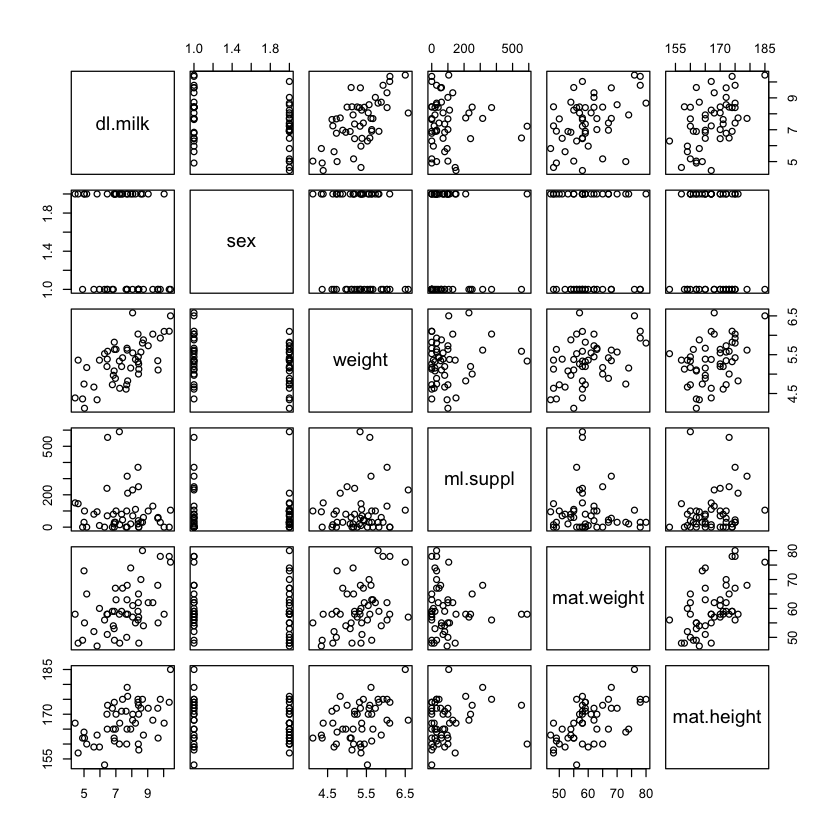

In [42]:
# wygenerowanie wykresu parami bez pierwszej kolumny (no)
pairs(kfm[, -1])

In [43]:
# przykladowe obserwacje i zaleznosci pomiedzy zmiennymi:
# mamy 2 plcie
# ilosc spozywanego mleka w dl na dobe zalezy liniowo od wagi noworodka w kg
# waga matki w kg zalezy liniowo od ilosci spozywanego mleka w dl na dobe
# ilosc przyjmowanego suplementu w ml na dobe nie zalezy liniowo od wagi matki w kg

#### (d) Eliminacja krokowa zmiennych w modelu

In [44]:
# podsumowanie podstawowego modelu
summary(lm(dl.milk ~ . - no, data = kfm))


Call:
lm(formula = dl.milk ~ . - no, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74201 -0.81173 -0.00926  0.78326  2.52646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.681839   4.361561  -2.678 0.010363 *  
sexgirl      -0.499532   0.312672  -1.598 0.117284    
weight        1.349124   0.322450   4.184 0.000135 ***
ml.suppl     -0.002233   0.001241  -1.799 0.078829 .  
mat.weight    0.006212   0.023708   0.262 0.794535    
mat.height    0.072278   0.030169   2.396 0.020906 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 44 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.4943 
F-statistic: 10.58 on 5 and 44 DF,  p-value: 1.03e-06


In [45]:
# wyrzucamy wage matki - zmienna o najwyzszej p-wartosci

In [46]:
summary(lm(dl.milk ~ . - no - mat.weight, data = kfm))


Call:
lm(formula = dl.milk ~ . - no - mat.weight, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77312 -0.81196 -0.00683  0.76988  2.52240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.112571   3.997860  -3.030  0.00405 ** 
sexgirl      -0.494675   0.308875  -1.602  0.11626    
weight        1.372524   0.306612   4.476 5.14e-05 ***
ml.suppl     -0.002313   0.001190  -1.943  0.05824 .  
mat.height    0.076363   0.025560   2.988  0.00454 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.064 on 45 degrees of freedom
Multiple R-squared:  0.5452,	Adjusted R-squared:  0.5047 
F-statistic: 13.48 on 4 and 45 DF,  p-value: 2.658e-07


In [47]:
# nastepnie wyrzucamy plec - zmienna o najwyzszej p-wartosci

In [48]:
summary(lm(dl.milk ~ . - no - mat.weight - sex, data = kfm))


Call:
lm(formula = dl.milk ~ . - no - mat.weight - sex, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06540 -0.74758 -0.02408  0.67488  2.79882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.064926   4.020073  -3.250  0.00216 ** 
weight        1.464781   0.306231   4.783 1.81e-05 ***
ml.suppl     -0.002237   0.001209  -1.850  0.07074 .  
mat.height    0.077600   0.025979   2.987  0.00451 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.082 on 46 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.4879 
F-statistic: 16.56 on 3 and 46 DF,  p-value: 1.953e-07


In [49]:
# wyrzucamy z modelu ilosc przyjmowanego suplementu - zmienna o najwyzszej p-wartosci

In [50]:
summary(lm(dl.milk ~ . - no - mat.weight - sex - ml.suppl, data = kfm))


Call:
lm(formula = dl.milk ~ . - no - mat.weight - sex - ml.suppl, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19598 -0.82149  0.01822  0.75582  2.83375 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.92014    4.07325  -2.926  0.00527 ** 
weight        1.42862    0.31338   4.559 3.67e-05 ***
mat.height    0.07063    0.02636   2.680  0.01013 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.109 on 47 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4615 
F-statistic:    22 on 2 and 47 DF,  p-value: 1.811e-07


In [51]:
# w powstalym modelu kazda zmienna jest statystycznie istotna - wyraz wolny, wage noworodka w kg oraz wzrost matki w cm
# dopasowanie naszego modelu jest bardzo przecietne - wspolczynnik Adjusted R-squared wynosi 0.4615
# wyraz wolny jest ujemny - dla wagi noworodka i wzroscie matki wynoszacych 0 kg i 0 cm noworodek spozywalby -11.92014 dl/24h mleka
# wszystkie powyzsze wartosci sa niemozliwe do osiagniecia - mamy swoista interpolacje naszej prostej

#### Powstały model określający ilość spożywanego mleka przez noworodki w dl na dobę:
$\widehat{y} = -11.92014 + 1.42862 \cdot \textrm{weight} + 0.07063 \cdot \textrm{mat.height}$

In [52]:
# koncowy model
model_ostateczny_1 = lm(dl.milk ~ . - no - mat.weight - sex - ml.suppl, data = kfm)
# predykcja wartosci na podstawie naszego modelu
predict(model_ostateczny_1)

1         2         3         4         5         6         7         8 
 7.444594  6.565169  7.159300  6.816255  7.509861  6.780617  8.908755  7.605578 
        9        10        11        12        13        14        15        16 
 9.342957  8.281766  6.747603  7.995493  8.748398  9.057332  8.560073  6.981095 
       17        18        19        20        21        22        23        24 
 7.863983  6.965810  7.969525 10.433642  5.975775  6.832420  9.090992  5.750504 
       25        26        27        28        29        30        31        32 
 7.829597  8.589448  8.184444  6.440351  8.725892  8.686692  6.780539  7.003580 
       33        34        35        36        37        38        39        40 
 8.139883  8.009878  6.140791  8.182565  6.765000  7.403615  7.099572  5.407634 
       41        42        43        44        45        46        47        48 
 6.130693  7.502795  7.556555  7.579061  7.426726  6.496518  8.414002  6.825981 
       49        50 
 6.719559  5.791131

In [53]:
# wszystkie wartosci wyszly dodatnie - sa odpowiednie

In [54]:
# podsumowanie predykcji na podstawie naszego modelu
summary(predict(model_ostateczny_1))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.408   6.781   7.474   7.504   8.184  10.434 

In [55]:
# opis wyniku:
# Min. - wartosc minimalna
# 1st Qu. - 1 kwantyl
# Median - mediana
# Mean - srednia
# 3rd Qu. - 3 kwantyl
# Max. - wartosc maksymalna

In [56]:
# nalezy zauwazyc, ze mediana i srednia sa bardzo do siebie zblizone, pomimo tego, ze nasz model nie jest optymalny (niewielka wartosc korelacji Pearsona)

## Zadanie 2

#### Wczytywanie danych

In [57]:
# zaladowanie zbioru danych
data(iris)
# podsumowanie zbioru danych
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [58]:
# mamy 3 rozne gatunki Iris, kazdy ma po 50 obserwacji
# dla kazdego kwiatu mamy dlugosc i szerokosc kielicha oraz dlugosc i szerokosc platka

In [59]:
# dzielimy nasz zbior danych na 3 podzbiory osobnych gatunkow
iris.versicolor = iris[iris$Species == "versicolor", 1:4]
iris.setosa = iris[iris$Species == "setosa", 1:4]
iris.virginica = iris[iris$Species == "virginica", 1:4]

In [60]:
# obliczenie sredniej dlugosci kielicha w zaleznosci od gatunku
aggregate(iris$Sepal.Length, by = list(iris$Species), FUN = "mean")
# by - dzieli nasze zmienne na podgrupy wzgledem okreslonej wartosci
# FUN - uzyta funkcja

Group.1,x
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


#### (a) Histogramy rozkładu długości i szerokości kielicha

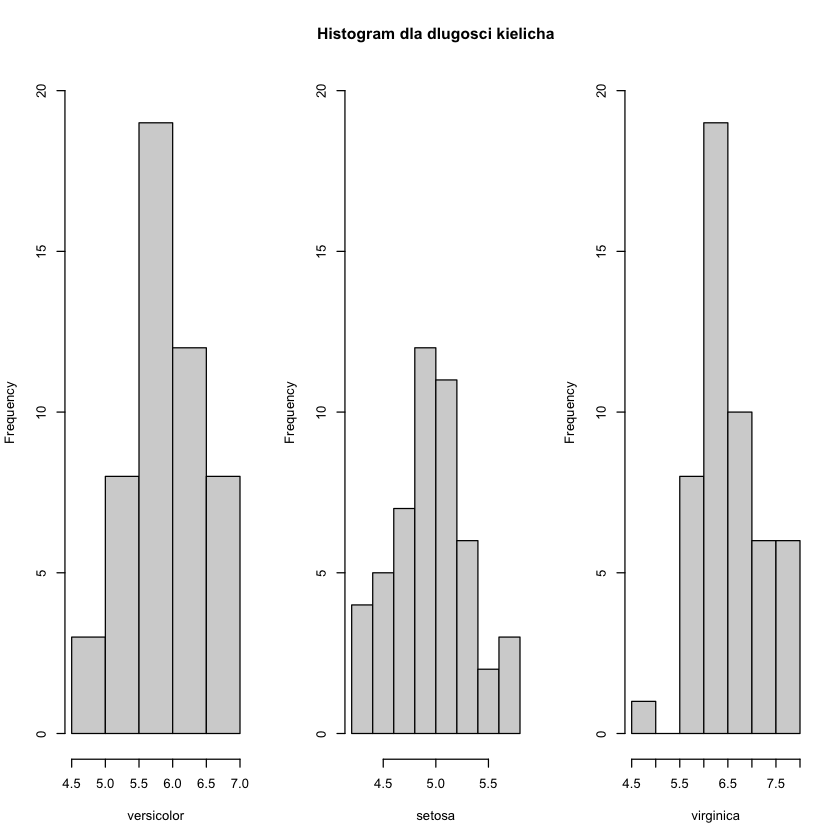

In [61]:
# przygotowanie pola wykresu
par(mfrow = c(1, 3))
# narysowanie histogramow - na osi X podpisujemy gatunek, tytul tylko w przypadku srodkowego wykresu, ustawienie tej samej skali wykresow
hist(iris.versicolor$Sepal.Length, main = "", xlab = "versicolor", ylim = c(0, 20))
hist(iris.setosa$Sepal.Length, main = "Histogram dla dlugosci kielicha", xlab = "setosa", ylim = c(0, 20))
hist(iris.virginica$Sepal.Length, main = "", xlab = "virginica", ylim = c(0, 20))

In [62]:
# dla gatunkow Iris versicolor i Iris virginica mamy wiecej obserwacji srodkowych niz dla gatunku Iris setosa
# dla gatunku Iris setosa os X jest znacznie krotsza - odchylenie standardowe jest mniejsze niz dla pozostaych gatunkow

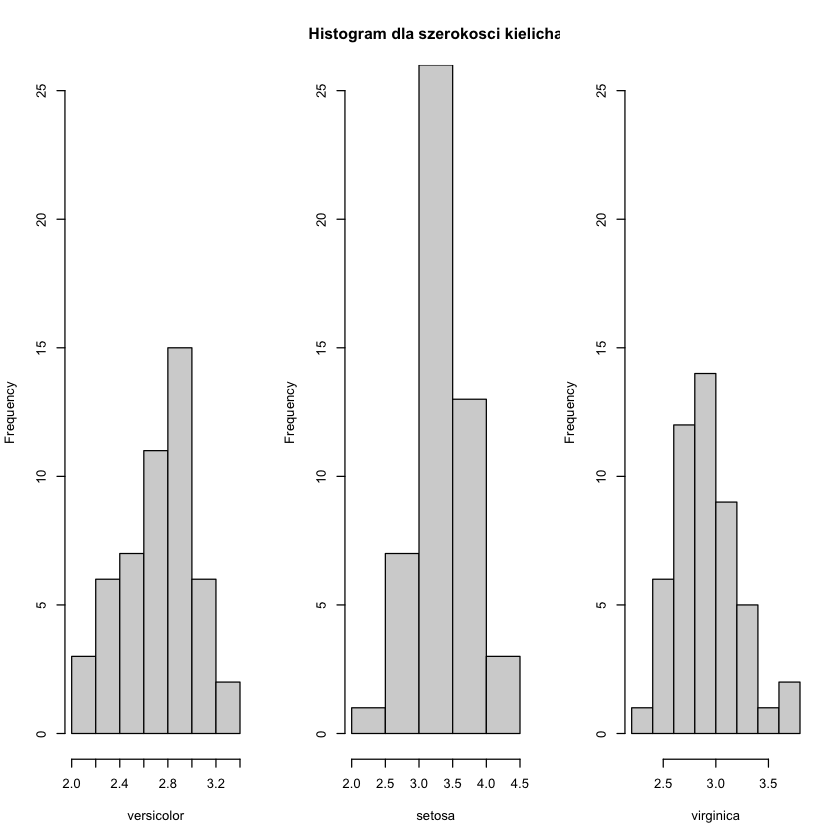

In [63]:
# przygotowanie pola wykresu
par(mfrow = c(1, 3))
# narysowanie histogramow - na osi X podpisujemy gatunek, tytul tylko w przypadku srodkowego wykresu, ustawienie tej samej skali wykresow
hist(iris.versicolor$Sepal.Width, main = "", xlab = "versicolor", ylim = c(0, 25))
hist(iris.setosa$Sepal.Width, main = "Histogram dla szerokosci kielicha", xlab = "setosa", ylim = c(0, 25))
hist(iris.virginica$Sepal.Width, main = "", xlab = "virginica", ylim = c(0, 25))

In [64]:
# dla szerokosci kielicha, poniewaz najwiecej srodkowych obserwacji ma gatunek Iris setosa
# gatunek Iris setosa ma znacznie wiekszy zakres szerokosci kielicha

#### (b) Wykresy korelacji parami

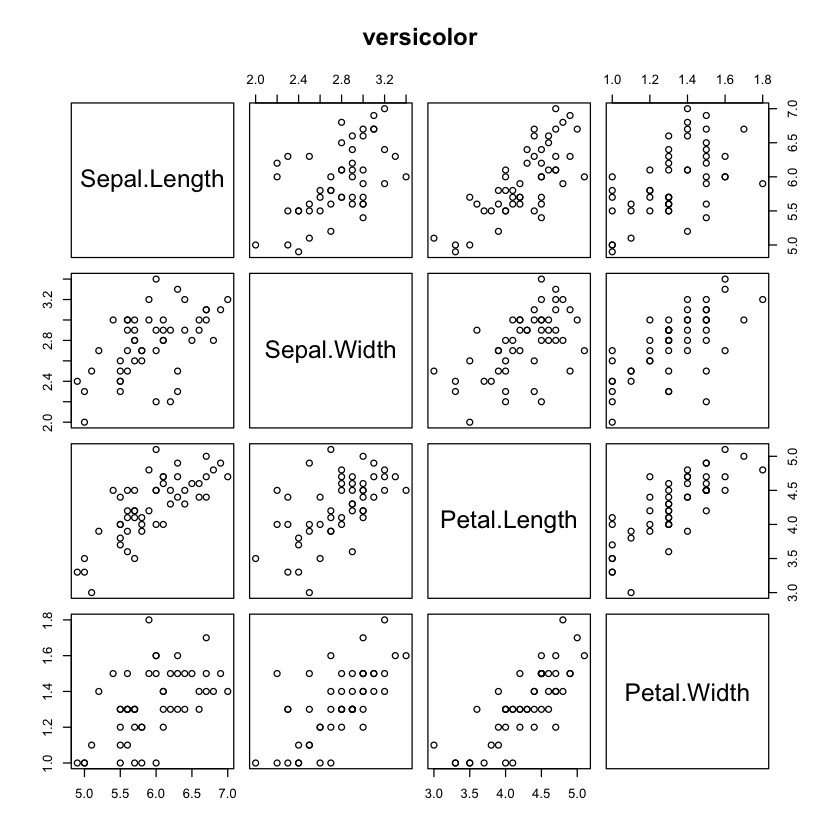

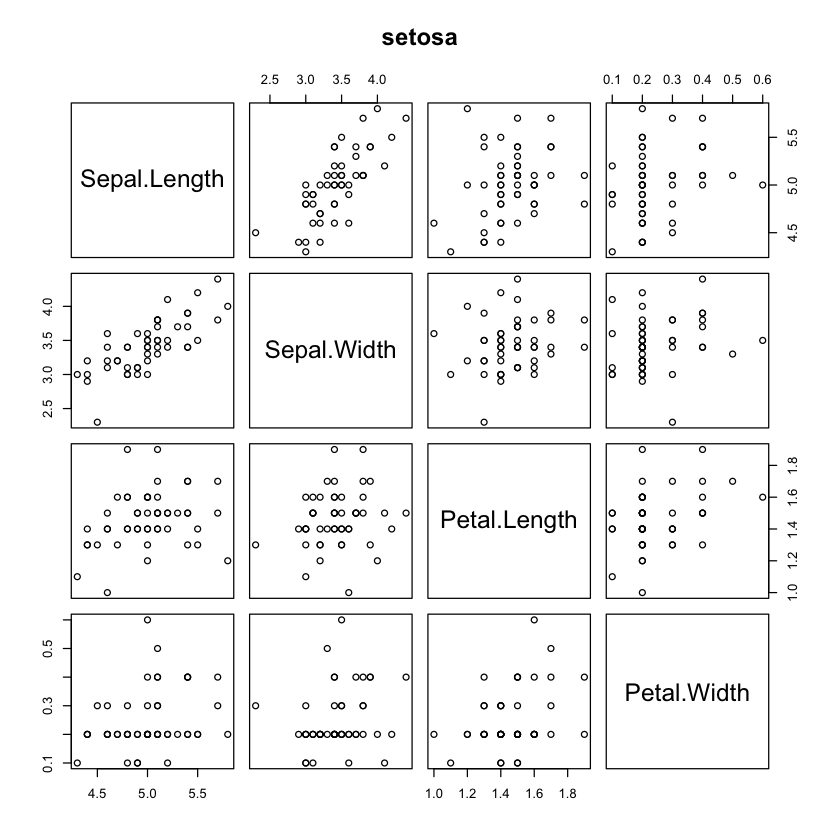

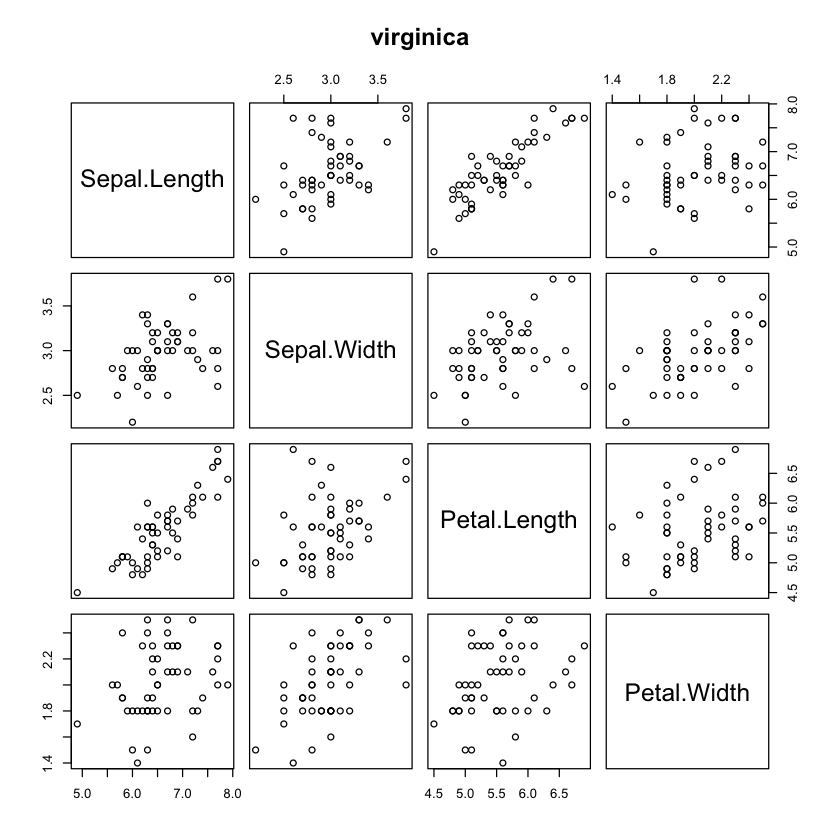

In [65]:
# przygotowanie pola wykresu
par(mfrow = c(3, 1))
# wykonanie wykresow korelacji parami osobno dla kazdego gatunku
pairs(iris.versicolor, main = "versicolor")
pairs(iris.setosa, main = "setosa")
pairs(iris.virginica, main = "virginica")

In [66]:
# sa to wykresy pogladowe
# przykladowa obserwacja - pomiedzy dlugoscia a szerokoscia platka w przypadku gatunku Iris setosa zaleznosc jest liniowa

#### (c) Porównanie wartości współczynnników korelacji

In [67]:
#macierze korelacji dla wszystkich gatunkow
cor(iris.versicolor)
cor(iris.setosa)
cor(iris.virginica)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,0.5259107,0.7540490,0.5464611
Sepal.Width,0.5259107,1.0000000,0.5605221,0.6639987
Petal.Length,0.7540490,0.5605221,1.0000000,0.7866681
Petal.Width,0.5464611,0.6639987,0.7866681,1.0000000


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,0.7425467,0.2671758,0.2780984
Sepal.Width,0.7425467,1.0000000,0.1777000,0.2327520
Petal.Length,0.2671758,0.1777000,1.0000000,0.3316300
Petal.Width,0.2780984,0.2327520,0.3316300,1.0000000


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,0.4572278,0.8642247,0.2811077
Sepal.Width,0.4572278,1.0000000,0.4010446,0.5377280
Petal.Length,0.8642247,0.4010446,1.0000000,0.3221082
Petal.Width,0.2811077,0.5377280,0.3221082,1.0000000


In [68]:
# najwieksze wartosci korelacji wielkosci dla poszczegolnych gatunkow
# Iris versicolor - pomiedzy dlugoscia a szerokoscia platka
# Iris setosa - pomiedzy dlugoscia a szerokoscia kielicha
# Iris virginica - pomiedzy dlugoscia kielicha a dlugoscia platka

In [69]:
# sprawdzenie istotnosci statystycznej korelacji pomiedzy dlugoscia a szerokoscia platka dla gatunku Iris versicolor
cor.test(iris.versicolor$Sepal.Length, iris.versicolor$Petal.Length)


	Pearson's product-moment correlation

data:  iris.versicolor$Sepal.Length and iris.versicolor$Petal.Length
t = 7.9538, df = 48, p-value = 2.586e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6020680 0.8532995
sample estimates:
     cor 
0.754049 


In [70]:
# wartosc p-value jest mniejsza niz 0.05 - wspolczynnik korelacji jest statystycznie istotny

In [71]:
# sprawdzenie istotnosci statystycznej korelacji pomiedzy dlugoscia a szerokoscia kielicha dla gatunku Iris setosa
cor.test(iris.setosa$Sepal.Length, iris.setosa$Petal.Length)


	Pearson's product-moment correlation

data:  iris.setosa$Sepal.Length and iris.setosa$Petal.Length
t = 1.9209, df = 48, p-value = 0.0607
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01206954  0.50776233
sample estimates:
      cor 
0.2671758 


In [72]:
# wartosc p-value jest wieksza niz 0.05 - wspolczynnik korelacji nie jest statystycznie istotny

In [73]:
# sprawdzenie istotnosci statystycznej korelacji pomiedzy dlugoscia kielicha a dlugoscia platka dla gatunku Iris virginica
cor.test(iris.virginica$Sepal.Length, iris.virginica$Petal.Length)


	Pearson's product-moment correlation

data:  iris.virginica$Sepal.Length and iris.virginica$Petal.Length
t = 11.901, df = 48, p-value = 6.298e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7714542 0.9210172
sample estimates:
      cor 
0.8642247 


In [74]:
# wartosc p-value jest mniejsza niz 0.05 - wspolczynnik korelacji jest statystycznie istotny

#### (d) Model regresji wielokrotnej

In [75]:
# wykonanie modelu z 3 zmiennymi niezaleznymi
model_2_1 = lm(Petal.Length ~ ., data = iris.setosa)
# podsumowanie modelu
summary(model_2_1)


Call:
lm(formula = Petal.Length ~ ., data = iris.setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38868 -0.07905  0.00632  0.10095  0.48238 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.86547    0.34331   2.521   0.0152 *
Sepal.Length  0.11606    0.10162   1.142   0.2594  
Sepal.Width  -0.02865    0.09334  -0.307   0.7602  
Petal.Width   0.46253    0.23410   1.976   0.0542 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1657 on 46 degrees of freedom
Multiple R-squared:  0.1449,	Adjusted R-squared:  0.08914 
F-statistic: 2.598 on 3 and 46 DF,  p-value: 0.06356


In [76]:
# wybieramy zmienna z najwieksza p-wartoscia - szerokosc kielicha, ktora usuwamy z naszego modelu

In [77]:
# wykonanie modelu z 2 zmiennymi niezaleznymi
model_2_2 = lm(Petal.Length ~ . - Sepal.Width, data = iris.setosa)
# podsumowanie modelu
summary(model_2_2)


Call:
lm(formula = Petal.Length ~ . - Sepal.Width, data = iris.setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40293 -0.08425  0.00073  0.09455  0.47839 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.88128    0.33614   2.622   0.0117 *
Sepal.Length  0.09342    0.06925   1.349   0.1838  
Petal.Width   0.45959    0.23164   1.984   0.0531 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1641 on 47 degrees of freedom
Multiple R-squared:  0.1432,	Adjusted R-squared:  0.1067 
F-statistic: 3.926 on 2 and 47 DF,  p-value: 0.0265


In [78]:
# wybieramy zmienna z najwieksza p-wartoscia - dlugosc kielicha, ktora usuwamy z naszego modelu

In [79]:
# wykonanie modelu z 1 zmienna niezalezna
model_2_3 = lm(Petal.Length ~ . - Sepal.Width - Sepal.Length, data = iris.setosa)
# podsumowanie modelu
summary(model_2_3)


Call:
lm(formula = Petal.Length ~ . - Sepal.Width - Sepal.Length, data = iris.setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43686 -0.09151 -0.03686  0.09018  0.46314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.32756    0.05996  22.141   <2e-16 ***
Petal.Width  0.54649    0.22439   2.435   0.0186 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1655 on 48 degrees of freedom
Multiple R-squared:   0.11,	Adjusted R-squared:  0.09144 
F-statistic: 5.931 on 1 and 48 DF,  p-value: 0.01864


In [80]:
# obie zmienne sa statystycznie istotne
# wspolczynnik R2 jest bardzo niski - dopasowanie modelu do danych jest bardzo slabe, przez co ma on niewielka zdolnosc predykcyjna

##### Otrzymany model - zależność długości płatka od jego szerokości:
$\widehat{y} = 1.32756 + 0.54649\cdot \textrm{Petal.Width}$

In [81]:
# jak szerokosc platka zwiekszy sie o 1 to szerokosc platka zwiekszy sie o 0.54649 